In [1]:
import os

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('customer_segmentation_sample.csv')
df.head()

,Age,Annual_Income,Frequency,Spending_Score
0,56,45342,24,12
1,46,57157,32,55
2,32,87863,47,13
3,25,126308,22,23
4,38,72083,23,89


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

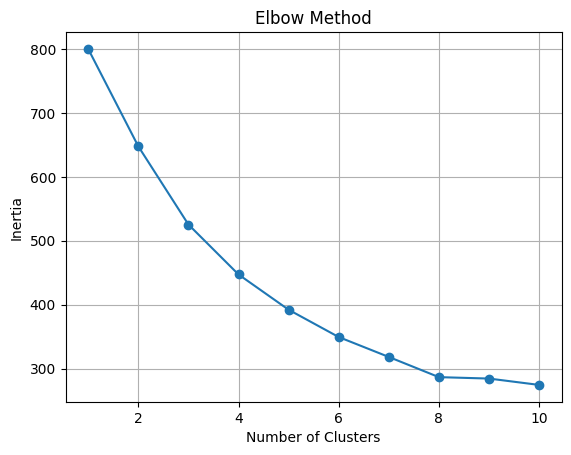

In [8]:
inertia = []

# Create and fit a StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df) # Scale the dataframe and store the result in scaled_df

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

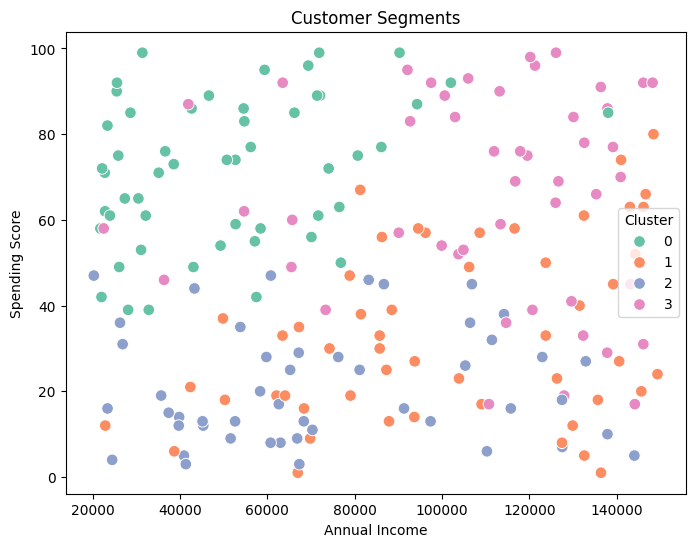

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='Set2', s=70)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

In [11]:
df.groupby('Cluster').mean(numeric_only=True)

,Age,Annual_Income,Frequency,Spending_Score
Cluster,,,,
0,40.538462,51201.038462,31.250000,71.846154
1,27.807692,100935.096154,35.115385,33.615385
2,50.958333,72871.625000,23.312500,21.104167
3,36.104167,110009.166667,12.145833,65.812500


In [12]:
df.to_csv('clustered_customers.csv', index=False)